In [2]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray
import os


C:\Users\trand\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
def show_images(*images):
    # Tạo một khung đồ thị với 1 hàng và số lượng hình ảnh cột
    fig, axs = plt.subplots(1, len(images), figsize=(5 * len(images), 5))

    # Nếu chỉ có một hình ảnh, axs sẽ không phải là một mảng
    # Do đó, chúng ta cần chuyển nó thành một mảng để có thể lặp qua nó
    if len(images) == 1:
        axs = [axs]

    # Show images
    for i, img in enumerate(images):
        # If image have less than 3 channels, show it in gray 
        if img.ndim < 3:
            axs[i].imshow(img, cmap='gray')
        else:
            axs[i].imshow(img)
        axs[i].set_title(f'Image {i+1}')

    plt.show()


# Bài 1

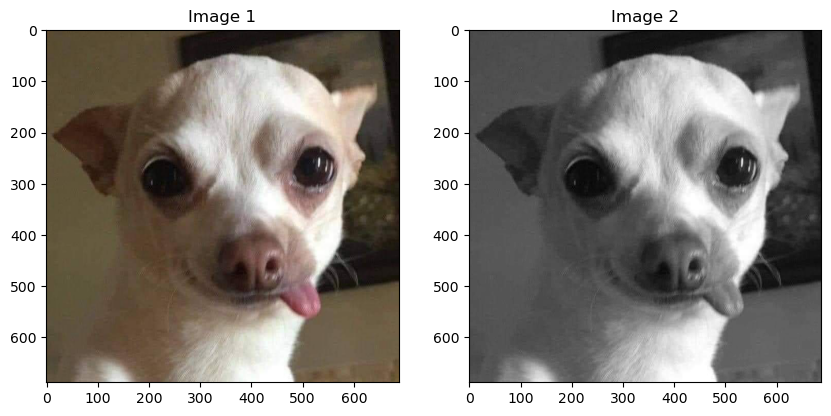

In [25]:
#Read image
img1 = plt.imread('C:/Users/trand/Documents/Digital Image Processing/Lab04/data/img1.jpg')

#Convert image into gray
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

#Display 2 images
show_images(img1, gray_img1)

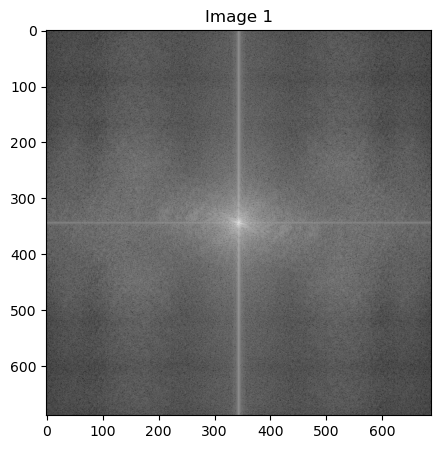

In [48]:
# Apply Fourier Transform
f = np.fft.fft2(gray1)
fshift = np.fft.fftshift(f)

# Visualize frequency domain
frequency_domain = np.log(np.abs(fshift) + 1)

#show images
show_images(frequency_domain)

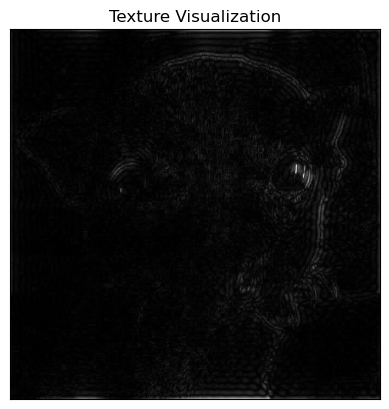

In [53]:
# Create mask with high frequency region blocked (for texture)
rows, cols = gray.shape
crow, ccol = rows // 2 , cols // 2 
mask_high_freq_blocked = fshift.copy()
mask_high_freq_blocked[crow-30:crow+30, ccol-30:ccol+30] = 0

# Apply inverse FFT for texture visualization 
f_ishift_texture= np.fft.ifftshift(mask_high_freq_blocked)
img_back_texture= np.fft.ifft2(f_ishift_texture)
img_back_texture= np.abs(img_back_texture)


#Show image
plt.imshow(img_back_texture,cmap='gray')
plt.title('Texture Visualization'), plt.xticks([]), plt.yticks([])
plt.show()

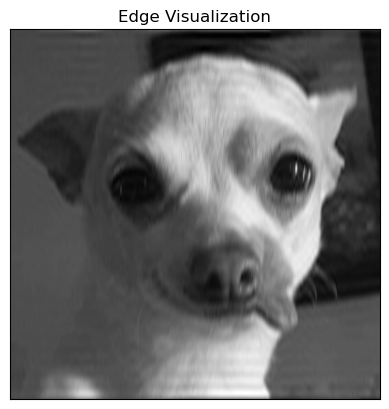

In [51]:
# Create mask with low frequency region blocked (for edges)
mask_low_freq_blocked = fshift.copy()
mask_low_freq_blocked[0:crow-30,:] = 0 
mask_low_freq_blocked[crow+30:,:] = 0 

# Apply inverse FFT for edge visualization 
f_ishift_edge= np.fft.ifftshift(mask_low_freq_blocked)
img_back_edge= np.fft.ifft2(f_ishift_edge)
img_back_edge= np.abs(img_back_edge)

plt.imshow(img_back_edge,cmap='gray')
plt.title('Edge Visualization'), plt.xticks([]), plt.yticks([])

plt.show()

# Bài 2


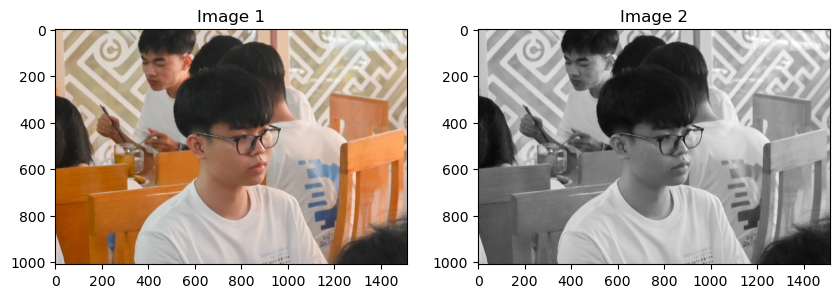

In [34]:
#Read image
img2 = plt.imread('C:/Users/trand/Documents/Digital Image Processing/data/imgtest.png')

#Convert image into gray
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

#Display 2 images
show_images(img2, gray2)

In [55]:
# print size in bytes of img2
print(os.stat('C:/Users/trand/Documents/Digital Image Processing/data/imgtest.png').st_size)

2192606


In [37]:
#Print shape of gray image
print(gray2.shape)
print(gray2)

(1010, 1515)
[[0.75778043 0.761702   0.7538588  ... 0.8370079  0.82507455 0.80154514]
 [0.76214904 0.75778043 0.7538588  ... 0.8192981  0.79952157 0.77554506]
 [0.76445097 0.7566079  0.7515569  ... 0.7916784  0.77162355 0.74764705]
 ...
 [0.76854515 0.7708471  0.7669255  ... 0.15681961 0.152451   0.14780393]
 [0.7736392  0.77913725 0.77476865 ... 0.16118824 0.16118824 0.15681961]
 [0.77476865 0.78030986 0.77521574 ... 0.16555686 0.16672942 0.15658432]]


In [83]:
def dct2(a):
    import scipy
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    import scipy
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [84]:
#Apply DCT
imf = dct2(img2)
imb = idct2(imf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


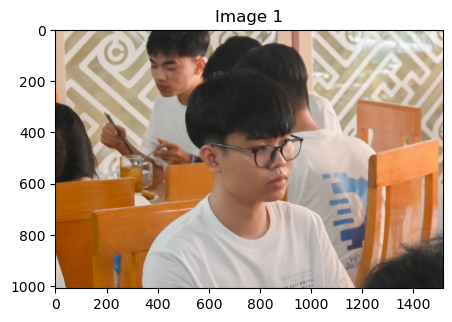

In [85]:
show_images(imb)

In [86]:
#Save image after apply DCT
cv2.imwrite('C:/Users/trand/Documents/Digital Image Processing/data/imb.png',imb)

True

In [87]:
#print size of bytes image after apply DCT
print(os.stat('C:/Users/trand/Documents/Digital Image Processing/data/imb.png').st_size)

73383


So với ảnh gốc thì ảnh sau khi thực hiện biến đổi DCT thì đã giảm dung lượng lưu trữ (ảnh gốc 2192606 - ảnh sau biến đổi 73383)

In [111]:
gray_size = gray2.shape
dct = np.zeros(gray_size)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:gray_size[0]:8]:
    for j in np.r_[:gray_size[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( gray2[i:(i+8),j:(j+8)] )

In [112]:
pos = 128
SampleBlock = gray4[pos:pos+20,pos:pos+20]
SampleDCT = dct2(SampleBlock)

Text(0.5, 1.0, '8x8 DCTs of the image')

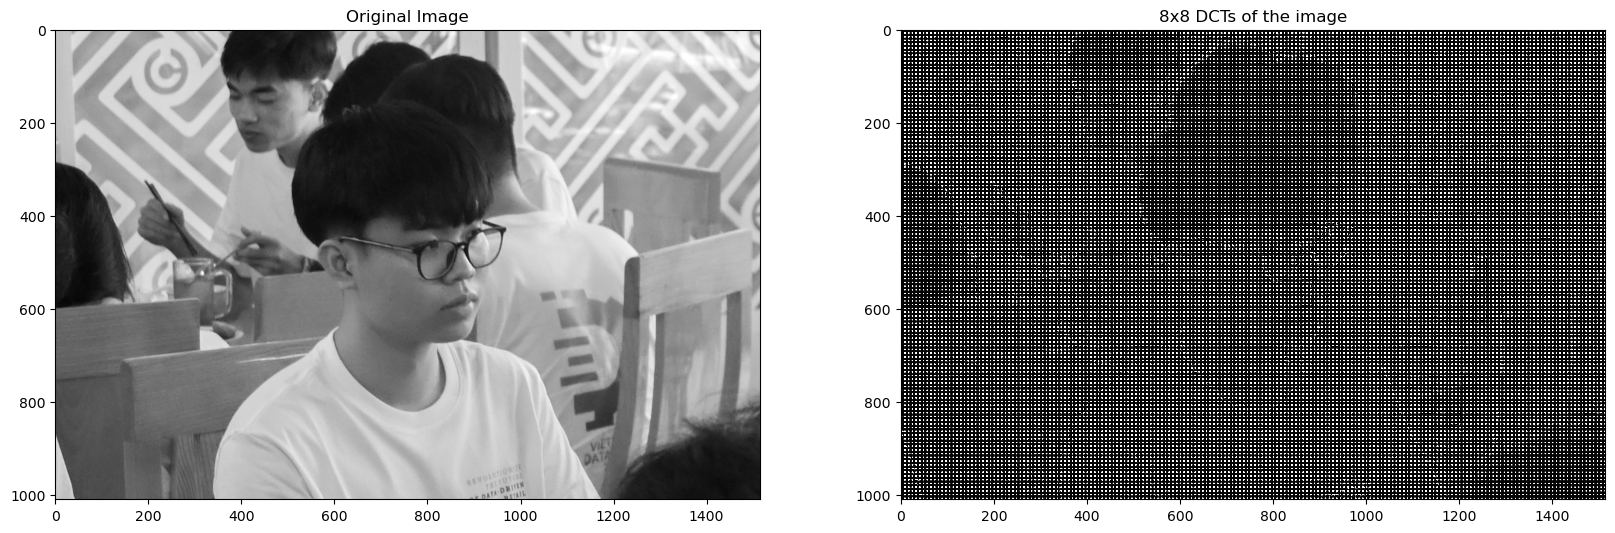

In [113]:
#Display entire DCT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gray2, cmap = 'gray')
plt.title( "Original Image")
plt.subplot(1,2,2)
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Keeping only 5.039833% of the DCT coefficients
Comparison between original and DCT compressed images


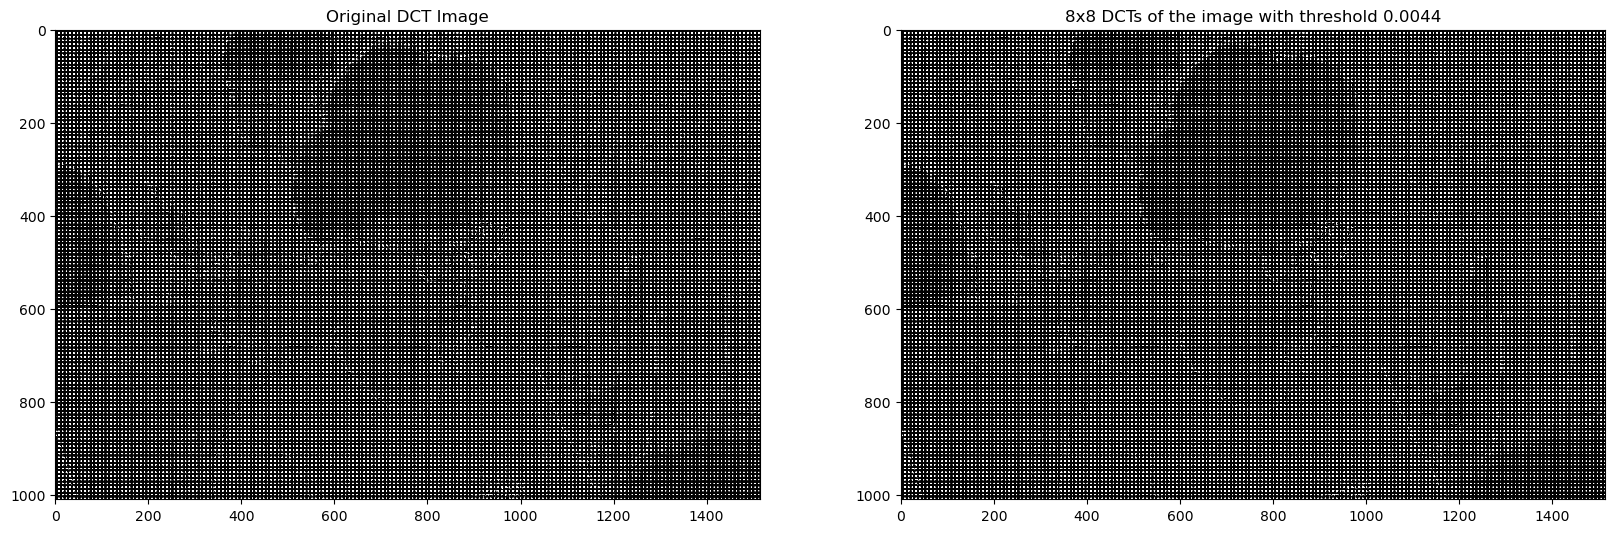

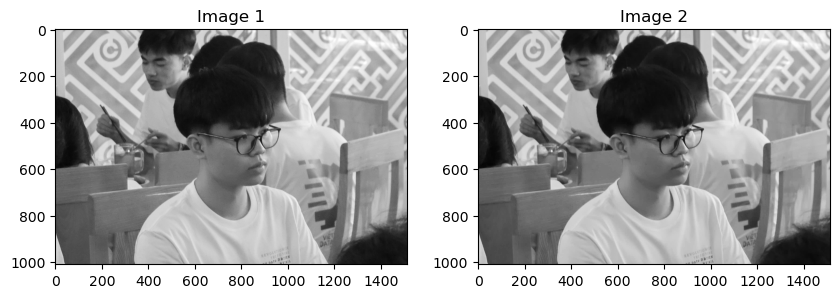

In [124]:
# Threshold
thresh = 0.0044
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Original DCT Image")
plt.subplot(1,2,2)
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image with threshold " + str(thresh))


percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (gray_size[0]*gray_size[1]*1.0)
print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

img_dct = np.zeros(gray_size)
for i in np.r_[:gray_size[0]:8]:
    for j in np.r_[:gray_size[1]:8]:
        img_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
print("Comparison between original and DCT compressed images" )
show_images(gray2,img_dct)

# Bài 3

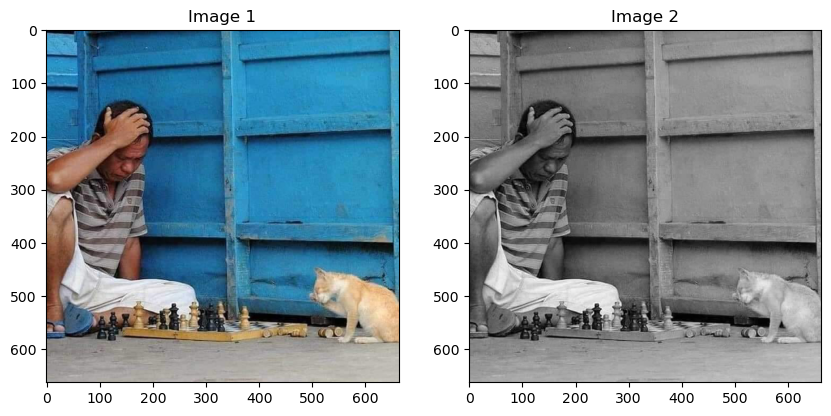

In [128]:
img3 = plt.imread('C:/Users/trand/Documents/Digital Image Processing/data/img28.jpg')
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

show_images(img3,gray3)

In [129]:
#size of bytes img3
size_img3 = os.stat('C:/Users/trand/Documents/Digital Image Processing/data/img28.jpg').st_size
print(f"size of img3: {size_img3}")

size of img3: 52979


In [136]:


def compress_image(image, alpha=0.05):
    # Chuyển đổi không gian màu từ BGR sang HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Áp dụng DCT và giữ lại alpha% hệ số
    compressed = dct2(hsv[:,:,2])
    k = np.floor(alpha*compressed.shape[0]*compressed.shape[1]).astype(int)
    indices = np.unravel_index(np.argsort(compressed.ravel()), compressed.shape)
    compressed[indices[:-k]] = 0
    
    # Khôi phục ảnh
    restored = idct2(compressed)
    hsv[:,:,2] = restored.astype('uint8')
    restored_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return restored_image



In [138]:


# Nén ảnh
compressed_image = compress_image(img3)

# Lưu ảnh đã nén
cv2.imwrite('C:/Users/trand/Documents/Digital Image Processing/data/compressed_image.jpg', compressed_image)




True

In [139]:
# Xuất dung lượng ảnh
print(f"Original image size: {os.path.getsize('C:/Users/trand/Documents/Digital Image Processing/data/img28.jpg') / 1024} KB")
print(f"Compressed image size: {os.path.getsize('C:/Users/trand/Documents/Digital Image Processing/data/compressed_image.jpg') / 1024} KB")

Original image size: 51.7373046875 KB
Compressed image size: 7.5029296875 KB
